In [ ]:
!pip install websocket-client requests pandas

[2025-09-30 13:38:34.492000] Price: 113673.82, Qty: 0.00353
[2025-09-30 13:38:34.492000] Price: 113673.82, Qty: 0.00353
[2025-09-30 13:38:34.492000] Price: 113673.82, Qty: 0.00353
[2025-09-30 13:38:35.145000] Price: 113673.81, Qty: 0.00049
[2025-09-30 13:38:35.145000] Price: 113673.81, Qty: 0.00049
[2025-09-30 13:38:35.145000] Price: 113673.81, Qty: 0.00049
[2025-09-30 13:38:35.484000] Price: 113673.81, Qty: 0.0004
[2025-09-30 13:38:35.484000] Price: 113673.81, Qty: 0.0004
[2025-09-30 13:38:35.484000] Price: 113673.81, Qty: 0.0004
[2025-09-30 13:38:35.867000] Price: 113673.82, Qty: 6e-05[2025-09-30 13:38:35.867000] Price: 113673.82, Qty: 6e-05

[2025-09-30 13:38:35.867000] Price: 113673.82, Qty: 6e-05
[2025-09-30 13:38:36.117000] Price: 113673.81, Qty: 0.1304
[2025-09-30 13:38:36.117000] Price: 113673.81, Qty: 0.1304
[2025-09-30 13:38:36.117000] Price: 113673.81, Qty: 0.1304
[2025-09-30 13:38:36.201000] Price: 113673.81, Qty: 4e-05
[2025-09-30 13:38:36.201000] Price: 113673.81, Qty: 4e

In [ ]:
import json
import requests
import pandas as pd
import websocket
import threading
from datetime import datetime

In [ ]:
# Function to get historical klines from Binance REST API
def get_historical_klines(symbol="BTCUSDT", interval="1m", start=None, end=None, limit=1000):
    """
    Fetch historical candlestick (OHLCV) data from Binance.
    
    Parameters:
    - symbol: Trading pair (e.g., BTCUSDT)
    - interval: Candle interval ('1m', '5m', '1h', '1d', etc.)
    - start, end: timestamps in milliseconds (optional)
    - limit: max rows (default 1000)
    """
    url = "https://api.binance.com/api/v3/klines"
    params = {"symbol": symbol, "interval": interval, "limit": limit}
    if start: params["startTime"] = start
    if end: params["endTime"] = end
    
    resp = requests.get(url, params=params)
    data = resp.json()
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=[
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_asset_volume", "trades",
        "taker_buy_base", "taker_buy_quote", "ignore"
    ])
    # Convert timestamps
    df["open_time"] = pd.to_datetime(df["open_time"], unit="ms")
    df["close_time"] = pd.to_datetime(df["close_time"], unit="ms")
    
    # Convert numeric columns
    num_cols = ["open","high","low","close","volume"]
    df[num_cols] = df[num_cols].astype(float)
    
    return df

# Example: Last 500 1-minute candles
klines_df = get_historical_klines(symbol="BTCUSDT", interval="1m", limit=500)
klines_df.head(6)



,open_time,open,high,low,close,volume,close_time,quote_asset_volume,trades,taker_buy_base,taker_buy_quote,ignore
0,2025-09-29 23:39:00,114267.41,114267.42,114242.75,114242.76,1.68303,2025-09-29 23:39:59.999,192286.37542730,1609,0.06016000,6873.21443080,0
1,2025-09-29 23:40:00,114242.76,114242.76,114242.75,114242.76,1.11161,2025-09-29 23:40:59.999,126993.38506270,101,0.17352000,19823.40371520,0
2,2025-09-29 23:41:00,114242.75,114242.76,114242.75,114242.75,1.23071,2025-09-29 23:41:59.999,140599.70214890,132,0.72964000,83356.08740640,0
3,2025-09-29 23:42:00,114242.75,114242.76,114222.50,114222.51,5.91673,2025-09-29 23:42:59.999,675904.28196840,582,0.87263000,99689.89892130,0
4,2025-09-29 23:43:00,114222.51,114227.96,114222.50,114227.96,5.85714,2025-09-29 23:43:59.999,669025.22478520,359,5.59086000,638609.99976510,0
5,2025-09-29 23:44:00,114227.96,114227.96,114227.95,114227.96,1.01030,2025-09-29 23:44:59.999,115404.50679690,113,0.89119000,101798.81567240,0


In [ ]:
klines_df.shape

(500, 12)

In [ ]:
klines_df.dtypes

open_time             datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                       float64
close_time            datetime64[ns]
quote_asset_volume            object
trades                         int64
taker_buy_base                object
taker_buy_quote               object
ignore                        object
dtype: object

In [ ]:
klines_df.describe()

,open_time,open,high,low,close,volume,close_time,trades
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000
mean,2025-09-30 03:48:30,114214.234980,114230.989780,114196.329440,114213.016660,9.768425,2025-09-30 03:49:29.999000320,1586.084000
min,2025-09-29 23:39:00,113618.850000,113634.090000,113585.000000,113618.860000,0.438360,2025-09-29 23:39:59.999000,72.000000
25%,2025-09-30 01:43:45,113969.102500,113981.640000,113955.900000,113968.960000,3.465802,2025-09-30 01:44:44.999000064,701.000000
50%,2025-09-30 03:48:30,114275.970000,114282.700000,114260.940000,114275.970000,6.774710,2025-09-30 03:49:29.999000064,1330.500000
75%,2025-09-30 05:53:15,114400.720000,114428.065000,114384.990000,114400.725000,12.336972,2025-09-30 05:54:14.999000064,2121.500000
max,2025-09-30 07:58:00,114751.750000,114792.000000,114710.390000,114751.750000,154.198490,2025-09-30 07:58:59.999000,17959.000000
std,NaN,252.432776,256.105809,250.639669,253.645206,11.670122,NaN,1395.107973


In [ ]:
klines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open_time           500 non-null    datetime64[ns]
 1   open                500 non-null    float64       
 2   high                500 non-null    float64       
 3   low                 500 non-null    float64       
 4   close               500 non-null    float64       
 5   volume              500 non-null    float64       
 6   close_time          500 non-null    datetime64[ns]
 7   quote_asset_volume  500 non-null    object        
 8   trades              500 non-null    int64         
 9   taker_buy_base      500 non-null    object        
 10  taker_buy_quote     500 non-null    object        
 11  ignore              500 non-null    object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 47.0+ KB


In [ ]:
!pip install mplfinance

[2025-09-30 13:39:00.796000] Price: 113653.45, Qty: 0.00077[2025-09-30 13:39:00.796000] Price: 113653.45, Qty: 0.00077

[2025-09-30 13:39:00.796000] Price: 113653.45, Qty: 0.00077
[2025-09-30 13:39:01.098000] Price: 113653.45, Qty: 0.00025
[2025-09-30 13:39:01.098000] Price: 113653.45, Qty: 0.00025
[2025-09-30 13:39:01.098000] Price: 113653.45, Qty: 0.00025
[2025-09-30 13:39:01.446000] Price: 113653.45, Qty: 0.017[2025-09-30 13:39:01.446000] Price: 113653.45, Qty: 0.017

[2025-09-30 13:39:01.446000] Price: 113653.45, Qty: 0.017
[2025-09-30 13:39:02.531000] Price: 113653.44, Qty: 0.0061[2025-09-30 13:39:02.531000] Price: 113653.44, Qty: 0.0061
[2025-09-30 13:39:02.531000] Price: 113653.44, Qty: 0.0061

[2025-09-30 13:39:03.023000] Price: 113653.44, Qty: 0.00039
[2025-09-30 13:39:03.023000] Price: 113653.44, Qty: 0.00039
[2025-09-30 13:39:03.023000] Price: 113653.44, Qty: 0.00039
[2025-09-30 13:39:03.076000] Price: 113653.45, Qty: 0.017
[2025-09-30 13:39:03.076000] Price: 113653.45, Qty:

[2025-09-30 13:39:17.326000] Price: 113673.81, Qty: 0.017[2025-09-30 13:39:17.326000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:17.326000] Price: 113673.81, Qty: 0.017

[2025-09-30 13:39:17.531000] Price: 113673.8, Qty: 0.00202
[2025-09-30 13:39:17.531000] Price: 113673.8, Qty: 0.00202
[2025-09-30 13:39:17.531000] Price: 113673.8, Qty: 0.00202
[2025-09-30 13:39:18.018000] Price: 113673.8, Qty: 9e-05[2025-09-30 13:39:18.018000] Price: 113673.8, Qty: 9e-05

[2025-09-30 13:39:18.018000] Price: 113673.8, Qty: 9e-05
[2025-09-30 13:39:18.169000] Price: 113673.81, Qty: 7e-05
[2025-09-30 13:39:18.169000] Price: 113673.81, Qty: 7e-05
[2025-09-30 13:39:18.169000] Price: 113673.81, Qty: 7e-05
[2025-09-30 13:39:18.977000] Price: 113673.81, Qty: 0.017[2025-09-30 13:39:18.977000] Price: 113673.81, Qty: 0.017

[2025-09-30 13:39:18.977000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:19.278000] Price: 113673.8, Qty: 0.00494
[2025-09-30 13:39:19.278000] Price: 113673.8, Qty: 0.00494
[2025-09-30 

In [ ]:
import mplfinance as mpf

[2025-09-30 13:39:25.667000] Price: 113673.81, Qty: 0.017[2025-09-30 13:39:25.667000] Price: 113673.81, Qty: 0.017

[2025-09-30 13:39:25.667000] Price: 113673.81, Qty: 0.017


[2025-09-30 13:39:26.747000] Price: 113673.8, Qty: 0.00056
[2025-09-30 13:39:26.747000] Price: 113673.8, Qty: 0.00056
[2025-09-30 13:39:26.747000] Price: 113673.8, Qty: 0.00056
[2025-09-30 13:39:26.831000] Price: 113673.81, Qty: 0.00079
[2025-09-30 13:39:26.831000] Price: 113673.81, Qty: 0.00079
[2025-09-30 13:39:26.831000] Price: 113673.81, Qty: 0.00079
[2025-09-30 13:39:26.931000] Price: 113673.8, Qty: 0.00624
[2025-09-30 13:39:26.931000] Price: 113673.8, Qty: 0.00624
[2025-09-30 13:39:26.931000] Price: 113673.8, Qty: 0.00624
[2025-09-30 13:39:27.069000] Price: 113673.81, Qty: 0.00031[2025-09-30 13:39:27.069000] Price: 113673.81, Qty: 0.00031

[2025-09-30 13:39:27.069000] Price: 113673.81, Qty: 0.00031
[2025-09-30 13:39:27.385000] Price: 113673.81, Qty: 0.017[2025-09-30 13:39:27.385000] Price: 113673.81, Qty: 0.017

[2025-09-30 13:39:27.385000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:28.207000] Price: 113673.81, Qty: 0.00013
[2025-09-30 13:39:28.207000] Price: 113673.81, Qty: 

In [ ]:
klines_df.set_index('close_time').tail(100)

,open_time,open,high,low,close,volume,quote_asset_volume,trades,taker_buy_base,taker_buy_quote,ignore
close_time,,,,,,,,,,,
2025-09-30 06:19:59.999,2025-09-30 06:19:00,113923.29,113923.29,113899.98,113899.99,10.16914,1158337.24404200,759,0.27518000,31344.31778390,0
2025-09-30 06:20:59.999,2025-09-30 06:20:00,113899.99,113899.99,113899.73,113899.74,6.40727,729787.43680320,625,0.51111000,58215.36654140,0
2025-09-30 06:21:59.999,2025-09-30 06:21:00,113899.73,113899.74,113858.29,113858.29,12.36956,1408669.88127820,1856,0.44138000,50260.43249780,0
2025-09-30 06:22:59.999,2025-09-30 06:22:00,113858.30,113870.13,113852.72,113870.13,15.18168,1728515.85227500,902,5.33461000,607381.88635300,0
2025-09-30 06:23:59.999,2025-09-30 06:23:00,113870.13,113914.64,113870.12,113885.81,19.58272,2230354.18812000,2804,11.05943000,1259613.03103430,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-09-30 07:54:59.999,2025-09-30 07:54:00,113638.92,113740.12,113638.92,113740.11,45.67649,5193925.61813430,2512,40.66842000,4624469.31459870,0
2025-09-30 07:55:59.999,2025-09-30 07:55:00,113740.12,113787.56,113740.11,113787.08,36.39031,4140076.64911510,2212,27.50369000,3128987.67198180,0
2025-09-30 07:56:59.999,2025-09-30 07:56:00,113787.08,113787.09,113768.81,113783.64,7.77804,884979.48991100,709,3.87969000,441407.69494730,0


[2025-09-30 13:39:34.697000] Price: 113673.8, Qty: 0.00338
[2025-09-30 13:39:34.697000] Price: 113673.8, Qty: 0.00338
[2025-09-30 13:39:34.697000] Price: 113673.8, Qty: 0.00338
[2025-09-30 13:39:35.137000] Price: 113673.8, Qty: 0.00056
[2025-09-30 13:39:35.137000] Price: 113673.8, Qty: 0.00056
[2025-09-30 13:39:35.137000] Price: 113673.8, Qty: 0.00056
[2025-09-30 13:39:35.649000] Price: 113673.8, Qty: 0.00177[2025-09-30 13:39:35.649000] Price: 113673.8, Qty: 0.00177
[2025-09-30 13:39:35.657000] Price: 113673.8, Qty: 0.0018
[2025-09-30 13:39:35.649000] Price: 113673.8, Qty: 0.00177

[2025-09-30 13:39:35.657000] Price: 113673.8, Qty: 0.0018
[2025-09-30 13:39:35.678000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:35.754000] Price: 113673.8, Qty: 0.00182
[2025-09-30 13:39:35.657000] Price: 113673.8, Qty: 0.0018
[2025-09-30 13:39:35.678000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:35.678000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:35.754000] Price: 113673.8, Qty: 0.00182
[20

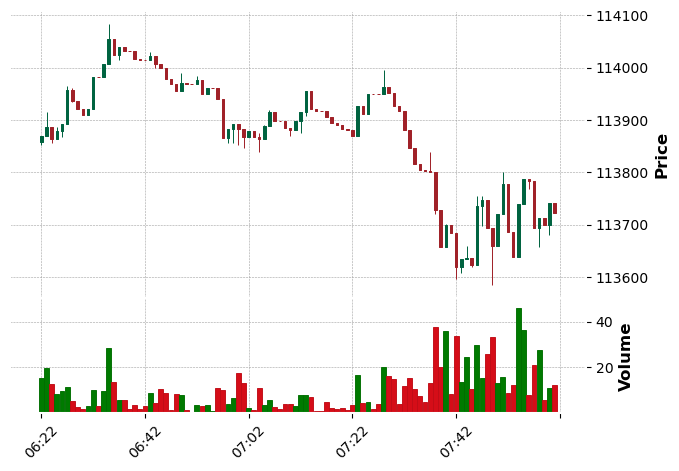

[2025-09-30 13:39:37.558000] Price: 113673.8, Qty: 0.00658
[2025-09-30 13:39:37.558000] Price: 113673.8, Qty: 0.00658
[2025-09-30 13:39:37.558000] Price: 113673.8, Qty: 0.00658
[2025-09-30 13:39:39.022000] Price: 113673.81, Qty: 0.017[2025-09-30 13:39:39.022000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:39.022000] Price: 113673.81, Qty: 0.017
[2025-09-30 13:39:39.212000] Price: 113673.8, Qty: 0.00028

[2025-09-30 13:39:39.212000] Price: 113673.8, Qty: 0.00028
[2025-09-30 13:39:39.212000] Price: 113673.8, Qty: 0.00028
[2025-09-30 13:39:39.553000] Price: 113673.8, Qty: 0.00015[2025-09-30 13:39:39.553000] Price: 113673.8, Qty: 0.00015

[2025-09-30 13:39:39.553000] Price: 113673.8, Qty: 0.00015
[2025-09-30 13:39:39.784000] Price: 113673.8, Qty: 0.00341
[2025-09-30 13:39:39.784000] Price: 113673.8, Qty: 0.00341
[2025-09-30 13:39:39.784000] Price: 113673.8, Qty: 0.00341
[2025-09-30 13:39:40.056000] Price: 113673.8, Qty: 0.00049[2025-09-30 13:39:40.056000] Price: 113673.8, Qty: 0.00049



In [ ]:
mpf.plot(klines_df.set_index('close_time').tail(100),
        type='candle', style='charles',
        volume=True,)

Matplotlib is building the font cache; this may take a moment.


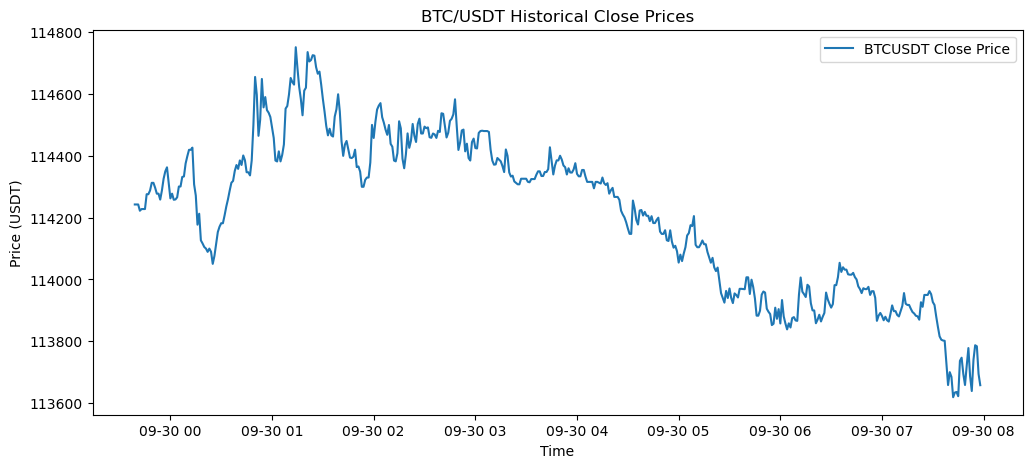

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(klines_df["open_time"], klines_df["close"], label="BTCUSDT Close Price")
plt.title("BTC/USDT Historical Close Prices")
plt.xlabel("Time")
plt.ylabel("Price (USDT)")
plt.legend()
plt.show()


In [ ]:
# Live BTC/USDT aggTrade stream
stream_url = "wss://stream.binance.com:9443/ws/btcusdt@aggTrade"

def on_message(ws, message):
    data = json.loads(message)
    price = float(data['p'])   # trade price
    qty = float(data['q'])     # trade quantity
    trade_time = datetime.fromtimestamp(data['T']/1000)
    print(f"[{trade_time}] Price: {price}, Qty: {qty}")

def on_error(ws, error):
    print("Error:", error)

def on_close(ws, close_status_code, close_msg):
    print("WebSocket closed")

def run_ws():
    ws = websocket.WebSocketApp(stream_url,
                                on_message=on_message,
                                on_error=on_error,
                                on_close=on_close)
    ws.run_forever()

# Run WebSocket in background thread
ws_thread = threading.Thread(target=run_ws)
ws_thread.start()


[2025-09-30 13:31:43.082000] Price: 113741.36, Qty: 6e-05


[2025-09-30 13:31:43.509000] Price: 113741.35, Qty: 0.00175
[2025-09-30 13:31:44.042000] Price: 113741.35, Qty: 0.00051
[2025-09-30 13:31:44.510000] Price: 113741.36, Qty: 6e-05
[2025-09-30 13:31:45.334000] Price: 113741.36, Qty: 9e-05
[2025-09-30 13:31:45.334000] Price: 113741.36, Qty: 9e-05
[2025-09-30 13:31:45.368000] Price: 113741.35, Qty: 0.00037
[2025-09-30 13:31:45.368000] Price: 113741.35, Qty: 0.00037
[2025-09-30 13:31:45.446000] Price: 113741.35, Qty: 0.00024
[2025-09-30 13:31:45.446000] Price: 113741.35, Qty: 0.00024
[2025-09-30 13:31:47.425000] Price: 113741.36, Qty: 6e-05
[2025-09-30 13:31:47.425000] Price: 113741.36, Qty: 6e-05
[2025-09-30 13:31:47.983000] Price: 113741.36, Qty: 0.00143[2025-09-30 13:31:47.983000] Price: 113741.36, Qty: 0.00143

[2025-09-30 13:31:48.220000] Price: 113741.36, Qty: 0.00058
[2025-09-30 13:31:48.220000] Price: 113741.36, Qty: 0.00058
[2025-09-30 13:31:48.247000] Price: 113741.35, Qty: 0.00184
[2025-09-30 13:31:48.247000] Price: 113741.35, Qty

In [ ]:
klines_df = get_historical_klines(symbol="BTCUSDT", interval="1m", limit=500)
klines_df.head()

[2025-09-30 13:31:57.091000] Price: 113727.08, Qty: 0.0002
[2025-09-30 13:31:57.091000] Price: 113727.08, Qty: 0.0002
[2025-09-30 13:31:57.247000] Price: 113727.07, Qty: 0.04917
[2025-09-30 13:31:57.247000] Price: 113727.07, Qty: 0.04917
[2025-09-30 13:31:57.249000] Price: 113727.07, Qty: 0.20222
[2025-09-30 13:31:57.250000] Price: 113727.06, Qty: 0.0007
[2025-09-30 13:31:57.250000] Price: 113727.05, Qty: 0.0003
[2025-09-30 13:31:57.250000] Price: 113727.04, Qty: 0.0001
[2025-09-30 13:31:57.250000] Price: 113726.44, Qty: 5e-05
[2025-09-30 13:31:57.250000] Price: 113725.78, Qty: 0.0002
[2025-09-30 13:31:57.250000] Price: 113725.62, Qty: 5e-05
[2025-09-30 13:31:57.249000] Price: 113727.07, Qty: 0.20222
[2025-09-30 13:31:57.250000] Price: 113725.26, Qty: 5e-05
[2025-09-30 13:31:57.250000] Price: 113724.29, Qty: 0.00096
[2025-09-30 13:31:57.250000] Price: 113724.05, Qty: 0.0001
[2025-09-30 13:31:57.250000] Price: 113727.06, Qty: 0.0007
[2025-09-30 13:31:57.250000] Price: 113727.05, Qty: 0.

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,trades,taker_buy_base,taker_buy_quote,ignore
0,2025-09-29 23:42:00,114242.75,114242.76,114222.50,114222.51,5.91673,2025-09-29 23:42:59.999,675904.28196840,582,0.87263000,99689.89892130,0
1,2025-09-29 23:43:00,114222.51,114227.96,114222.50,114227.96,5.85714,2025-09-29 23:43:59.999,669025.22478520,359,5.59086000,638609.99976510,0
2,2025-09-29 23:44:00,114227.96,114227.96,114227.95,114227.96,1.01030,2025-09-29 23:44:59.999,115404.50679690,113,0.89119000,101798.81567240,0
3,2025-09-29 23:45:00,114227.95,114227.96,114227.95,114227.95,0.44874,2025-09-29 23:45:59.999,51258.65250580,105,0.22228000,25390.59094880,0
4,2025-09-29 23:46:00,114227.96,114275.98,114227.96,114275.97,6.55952,2025-09-29 23:46:59.999,749491.67490250,1168,5.03842000,575670.35331550,0


[2025-09-30 13:31:58.366000] Price: 113722.01, Qty: 0.0005[2025-09-30 13:31:58.366000] Price: 113722.01, Qty: 0.0005

[2025-09-30 13:31:58.555000] Price: 113722.0, Qty: 0.00081
[2025-09-30 13:31:58.557000] Price: 113722.0, Qty: 0.86157
[2025-09-30 13:31:58.560000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.560000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.560000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.561000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.569000] Price: 113722.0, Qty: 0.0005
[2025-09-30 13:31:58.555000] Price: 113722.0, Qty: 0.00081
[2025-09-30 13:31:58.557000] Price: 113722.0, Qty: 0.86157
[2025-09-30 13:31:58.560000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.560000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.560000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.561000] Price: 113721.99, Qty: 0.00199
[2025-09-30 13:31:58.569000] Price: 113722.0, Qty: 0.0005
[2025-09-30 13:31:58.654000] Price: 113722.0, Qty:

In [ ]:
klines_df

[2025-09-30 13:32:11.016000] Price: 113693.35, Qty: 9e-05
[2025-09-30 13:32:11.094000] Price: 113693.34, Qty: 0.00879
[2025-09-30 13:32:11.094000] Price: 113693.34, Qty: 0.0017
[2025-09-30 13:32:11.163000] Price: 113693.34, Qty: 0.0005
[2025-09-30 13:32:11.016000] Price: 113693.35, Qty: 9e-05
[2025-09-30 13:32:11.094000] Price: 113693.34, Qty: 0.00879
[2025-09-30 13:32:11.094000] Price: 113693.34, Qty: 0.0017
[2025-09-30 13:32:11.163000] Price: 113693.34, Qty: 0.0005


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,trades,taker_buy_base,taker_buy_quote,ignore
0,2025-09-29 23:42:00,114242.75,114242.76,114222.50,114222.51,5.91673,2025-09-29 23:42:59.999,675904.28196840,582,0.87263000,99689.89892130,0
1,2025-09-29 23:43:00,114222.51,114227.96,114222.50,114227.96,5.85714,2025-09-29 23:43:59.999,669025.22478520,359,5.59086000,638609.99976510,0
2,2025-09-29 23:44:00,114227.96,114227.96,114227.95,114227.96,1.01030,2025-09-29 23:44:59.999,115404.50679690,113,0.89119000,101798.81567240,0
3,2025-09-29 23:45:00,114227.95,114227.96,114227.95,114227.95,0.44874,2025-09-29 23:45:59.999,51258.65250580,105,0.22228000,25390.59094880,0
4,2025-09-29 23:46:00,114227.96,114275.98,114227.96,114275.97,6.55952,2025-09-29 23:46:59.999,749491.67490250,1168,5.03842000,575670.35331550,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2025-09-30 07:57:00,113783.64,113783.64,113694.15,113694.16,20.96422,2025-09-30 07:57:59.999,2384001.24905540,2542,1.74182000,198083.63892260,0
496,2025-09-30 07:58:00,113694.15,113712.59,113657.20,113712.22,27.57372,2025-09-30 07:58:59.999,3134206.83181080,2113,7.27487000,826942.96611610,0
497,2025-09-30 07:59:00,113712.22,113712.23,113699.23,113699.23,5.77337,2025-09-30 07:59:59.999,656475.14717840,577,1.27721000,145226.30386430,0
498,2025-09-30 08:00:00,113699.24,113741.37,113679.94,113741.36,11.08691,2025-09-30 08:00:59.999,1260609.68582220,1923,6.35490000,722571.30290510,0


[2025-09-30 13:32:11.262000] Price: 113693.35, Qty: 0.00034[2025-09-30 13:32:11.262000] Price: 113693.35, Qty: 0.00034

[2025-09-30 13:32:11.369000] Price: 113693.34, Qty: 0.00343
[2025-09-30 13:32:11.369000] Price: 113693.34, Qty: 0.00343
[2025-09-30 13:32:11.386000] Price: 113693.35, Qty: 0.0005
[2025-09-30 13:32:11.386000] Price: 113693.35, Qty: 0.0005
[2025-09-30 13:32:13.108000] Price: 113693.35, Qty: 9e-05[2025-09-30 13:32:13.108000] Price: 113693.35, Qty: 9e-05

[2025-09-30 13:32:13.517000] Price: 113693.35, Qty: 6e-05[2025-09-30 13:32:13.517000] Price: 113693.35, Qty: 6e-05

[2025-09-30 13:32:14.469000] Price: 113693.35, Qty: 0.00341[2025-09-30 13:32:14.469000] Price: 113693.35, Qty: 0.00341

[2025-09-30 13:32:15.087000] Price: 113693.35, Qty: 0.00049
[2025-09-30 13:32:15.087000] Price: 113693.35, Qty: 0.00049
[2025-09-30 13:32:15.558000] Price: 113693.34, Qty: 0.00014[2025-09-30 13:32:15.558000] Price: 113693.34, Qty: 0.00014

[2025-09-30 13:32:15.604000] Price: 113693.35, Qty

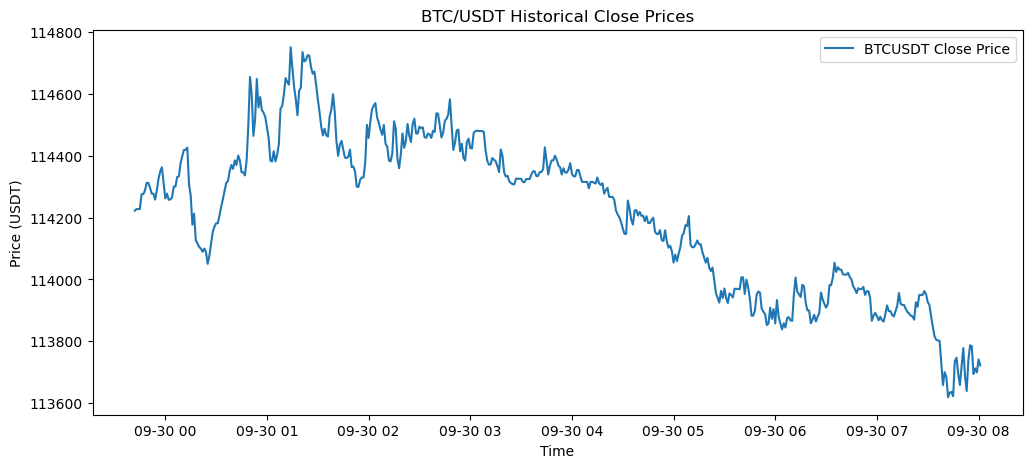

[2025-09-30 13:32:21.315000] Price: 113693.34, Qty: 0.00022[2025-09-30 13:32:21.315000] Price: 113693.34, Qty: 0.00022

[2025-09-30 13:32:21.654000] Price: 113693.34, Qty: 0.918
[2025-09-30 13:32:21.654000] Price: 113693.34, Qty: 0.918
[2025-09-30 13:32:21.807000] Price: 113693.34, Qty: 0.00628
[2025-09-30 13:32:21.807000] Price: 113693.34, Qty: 0.00628
[2025-09-30 13:32:22.359000] Price: 113693.35, Qty: 0.00012[2025-09-30 13:32:22.359000] Price: 113693.35, Qty: 0.00012

[2025-09-30 13:32:22.515000] Price: 113693.35, Qty: 9e-05
[2025-09-30 13:32:22.515000] Price: 113693.35, Qty: 9e-05
[2025-09-30 13:32:22.668000] Price: 113693.35, Qty: 0.00124
[2025-09-30 13:32:22.668000] Price: 113693.35, Qty: 0.00124
[2025-09-30 13:32:22.770000] Price: 113693.34, Qty: 0.00044
[2025-09-30 13:32:22.770000] Price: 113693.34, Qty: 0.00044
[2025-09-30 13:32:22.812000] Price: 113693.35, Qty: 0.0023
[2025-09-30 13:32:22.812000] Price: 113693.35, Qty: 0.0023
[2025-09-30 13:32:24.006000] Price: 113693.35, Qty

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(klines_df["open_time"], klines_df["close"], label="BTCUSDT Close Price")
plt.title("BTC/USDT Historical Close Prices")
plt.xlabel("Time")
plt.ylabel("Price (USDT)")
plt.legend()
plt.show()

In [ ]:
ws_thread = threading.Thread(target=run_ws)
ws_thread.start()

[2025-09-30 13:32:30.585000] Price: 113693.35, Qty: 0.00015
[2025-09-30 13:32:30.585000] Price: 113693.35, Qty: 0.00015
[2025-09-30 13:32:30.607000] Price: 113693.35, Qty: 0.00027
[2025-09-30 13:32:30.607000] Price: 113693.35, Qty: 0.00027
[2025-09-30 13:32:30.669000] Price: 113693.35, Qty: 0.00071
[2025-09-30 13:32:30.669000] Price: 113693.35, Qty: 0.00071
[2025-09-30 13:32:30.688000] Price: 113693.35, Qty: 0.01142
[2025-09-30 13:32:30.688000] Price: 113693.35, Qty: 0.01142
[2025-09-30 13:32:30.820000] Price: 113693.35, Qty: 0.00034
[2025-09-30 13:32:30.820000] Price: 113693.35, Qty: 0.00034
[2025-09-30 13:32:30.848000] Price: 113693.35, Qty: 0.00011
[2025-09-30 13:32:30.848000] Price: 113693.35, Qty: 0.00011
[2025-09-30 13:32:31.033000] Price: 113693.35, Qty: 0.00017[2025-09-30 13:32:31.033000] Price: 113693.35, Qty: 0.00017

[2025-09-30 13:32:31.114000] Price: 113693.35, Qty: 9e-05
[2025-09-30 13:32:31.114000] Price: 113693.35, Qty: 9e-05
[2025-09-30 13:32:31.261000] Price: 113693.3

In [ ]:
import json
import websocket

[2025-09-30 13:32:35.054000] Price: 113693.34, Qty: 0.00245[2025-09-30 13:32:35.054000] Price: 113693.34, Qty: 0.00245
[2025-09-30 13:32:35.054000] Price: 113693.34, Qty: 0.00245
[2025-09-30 13:32:35.061000] Price: 113693.34, Qty: 0.00013

[2025-09-30 13:32:35.061000] Price: 113693.34, Qty: 0.00013
[2025-09-30 13:32:35.061000] Price: 113693.34, Qty: 0.00013


[2025-09-30 13:32:35.757000] Price: 113693.34, Qty: 0.00034[2025-09-30 13:32:35.757000] Price: 113693.34, Qty: 0.00034
[2025-09-30 13:32:35.757000] Price: 113693.34, Qty: 0.00034

[2025-09-30 13:32:36.077000] Price: 113693.34, Qty: 0.01636[2025-09-30 13:32:36.077000] Price: 113693.34, Qty: 0.01636

[2025-09-30 13:32:36.077000] Price: 113693.34, Qty: 0.01636
[2025-09-30 13:32:36.079000] Price: 113693.34, Qty: 0.00016
[2025-09-30 13:32:36.079000] Price: 113693.34, Qty: 0.00016
[2025-09-30 13:32:36.091000] Price: 113693.33, Qty: 0.0011
[2025-09-30 13:32:36.079000] Price: 113693.34, Qty: 0.00016
[2025-09-30 13:32:36.116000] Price: 113693.33, Qty: 0.02947
[2025-09-30 13:32:36.091000] Price: 113693.33, Qty: 0.0011
[2025-09-30 13:32:36.116000] Price: 113693.32, Qty: 0.001
[2025-09-30 13:32:36.116000] Price: 113693.31, Qty: 0.0001
[2025-09-30 13:32:36.116000] Price: 113693.26, Qty: 9e-05
[2025-09-30 13:32:36.116000] Price: 113693.0, Qty: 0.00066
[2025-09-30 13:32:36.116000] Price: 113692.99, Q

In [ ]:
SOCKET = "wss://stream.binance.com:9443/ws/btcusdt@aggTrade"

[2025-09-30 13:32:40.966000] Price: 113685.88, Qty: 5e-05[2025-09-30 13:32:40.966000] Price: 113685.88, Qty: 5e-05
[2025-09-30 13:32:40.966000] Price: 113685.88, Qty: 5e-05

[2025-09-30 13:32:41.026000] Price: 113685.87, Qty: 0.00016
[2025-09-30 13:32:41.026000] Price: 113685.87, Qty: 0.00016
[2025-09-30 13:32:41.026000] Price: 113685.87, Qty: 0.00016
[2025-09-30 13:32:41.110000] Price: 113685.88, Qty: 0.4565
[2025-09-30 13:32:41.110000] Price: 113685.88, Qty: 0.4565
[2025-09-30 13:32:41.110000] Price: 113685.88, Qty: 0.4565


[2025-09-30 13:32:42.314000] Price: 113685.87, Qty: 0.00017[2025-09-30 13:32:42.314000] Price: 113685.87, Qty: 0.00017

[2025-09-30 13:32:42.314000] Price: 113685.87, Qty: 0.00017
[2025-09-30 13:32:42.839000] Price: 113685.87, Qty: 9e-05
[2025-09-30 13:32:42.839000] Price: 113685.87, Qty: 9e-05
[2025-09-30 13:32:42.839000] Price: 113685.87, Qty: 9e-05
[2025-09-30 13:32:43.667000] Price: 113685.88, Qty: 0.00031[2025-09-30 13:32:43.667000] Price: 113685.88, Qty: 0.00031

[2025-09-30 13:32:43.667000] Price: 113685.88, Qty: 0.00031
[2025-09-30 13:32:43.901000] Price: 113685.87, Qty: 6e-05
[2025-09-30 13:32:43.901000] Price: 113685.87, Qty: 6e-05
[2025-09-30 13:32:43.901000] Price: 113685.87, Qty: 6e-05
[2025-09-30 13:32:44.483000] Price: 113685.88, Qty: 9e-05[2025-09-30 13:32:44.483000] Price: 113685.88, Qty: 9e-05
[2025-09-30 13:32:44.483000] Price: 113685.88, Qty: 9e-05

[2025-09-30 13:32:44.529000] Price: 113685.88, Qty: 0.0053
[2025-09-30 13:32:44.529000] Price: 113685.88, Qty: 0.0053


In [ ]:
import json
import pandas as pd
from datetime import datetime
import websocket
import os

# 🔹 CSV file path
CSV_FILE = "btc_trades.csv"

# 🔹 Create CSV with headers if it doesn’t exist
if not os.path.exists(CSV_FILE):
    columns = ["trade_time", "price", "quantity", "is_buyer_maker"]
    pd.DataFrame(columns=columns).to_csv(CSV_FILE, index=False)

# 🔹 Callback when Binance sends a message
def on_message(ws, message):
    data = json.loads(message)

    # Extract useful trade info
    trade = {
        "trade_time": datetime.fromtimestamp(data['T'] / 1000),  # timestamp (ms → datetime)
        "price": float(data['p']),
        "quantity": float(data['q']),
        "is_buyer_maker": data['m']  # True if seller is the market maker
    }

    # Save row into CSV (append mode, no header)
    df = pd.DataFrame([trade])
    df.to_csv(CSV_FILE, mode='a', header=False, index=False)

    # Optional: print live
    print(trade)

def on_error(ws, error):
    print("Error:", error)

def on_close(ws, close_status_code, close_msg):
    print("### WebSocket closed ###")

def on_open(ws):
    print("✅ Connected to Binance WebSocket!")

# 🔹 Connect to Binance WebSocket
SOCKET = "wss://stream.binance.com:9443/ws/btcusdt@aggTrade"

ws = websocket.WebSocketApp(
    SOCKET,
    on_message=on_message,
    on_error=on_error,
    on_close=on_close
)

ws.on_open = on_open
ws.run_forever()


[2025-09-30 13:32:50.623000] Price: 113685.88, Qty: 0.00011[2025-09-30 13:32:50.623000] Price: 113685.88, Qty: 0.00011

[2025-09-30 13:32:50.623000] Price: 113685.88, Qty: 0.00011
[2025-09-30 13:32:51.055000] Price: 113685.87, Qty: 0.00016
[2025-09-30 13:32:51.055000] Price: 113685.87, Qty: 0.00016
[2025-09-30 13:32:51.055000] Price: 113685.87, Qty: 0.00016
[2025-09-30 13:32:51.468000] Price: 113685.87, Qty: 0.00036[2025-09-30 13:32:51.468000] Price: 113685.87, Qty: 0.00036

[2025-09-30 13:32:51.468000] Price: 113685.87, Qty: 0.00036
[2025-09-30 13:32:51.542000] Price: 113685.88, Qty: 0.00853
[2025-09-30 13:32:51.542000] Price: 113685.88, Qty: 0.00853
[2025-09-30 13:32:51.542000] Price: 113685.88, Qty: 0.00853
✅ Connected to Binance WebSocket!
[2025-09-30 13:32:51.893000] Price: 113685.88, Qty: 0.00044[2025-09-30 13:32:51.893000] Price: 113685.88, Qty: 0.00044

[2025-09-30 13:32:51.893000] Price: 113685.88, Qty: 0.00044
{'trade_time': datetime.datetime(2025, 9, 30, 13, 32, 51, 893000),

False

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt

# extra code – code to save the figures as high-res PNGs for the book
IMAGES_PATH = Path() / "images" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


[2025-09-30 13:42:16.014000] Price: 113689.83, Qty: 0.017
[2025-09-30 13:42:16.026000] Price: 113689.82, Qty: 4e-05
[2025-09-30 13:42:16.014000] Price: 113689.83, Qty: 0.017
[2025-09-30 13:42:16.014000] Price: 113689.83, Qty: 0.017
[2025-09-30 13:42:16.026000] Price: 113689.82, Qty: 4e-05
[2025-09-30 13:42:16.026000] Price: 113689.82, Qty: 4e-05
[2025-09-30 13:42:16.930000] Price: 113689.82, Qty: 0.00077[2025-09-30 13:42:16.930000] Price: 113689.82, Qty: 0.00077

[2025-09-30 13:42:16.930000] Price: 113689.82, Qty: 0.00077
[2025-09-30 13:42:17.033000] Price: 113689.82, Qty: 0.00189
[2025-09-30 13:42:17.033000] Price: 113689.82, Qty: 0.00189
[2025-09-30 13:42:17.033000] Price: 113689.82, Qty: 0.00189
[2025-09-30 13:42:17.037000] Price: 113689.82, Qty: 0.00188
[2025-09-30 13:42:17.037000] Price: 113689.82, Qty: 0.00188
[2025-09-30 13:42:17.037000] Price: 113689.82, Qty: 0.00188
[2025-09-30 13:42:17.084000] Price: 113689.83, Qty: 0.0025
[2025-09-30 13:42:17.084000] Price: 113689.83, Qty: 0

[2025-09-30 13:42:25.889000] Price: 113689.83, Qty: 0.017[2025-09-30 13:42:25.889000] Price: 113689.83, Qty: 0.017
[2025-09-30 13:42:25.958000] Price: 113689.82, Qty: 0.00349

[2025-09-30 13:42:25.889000] Price: 113689.83, Qty: 0.017
[2025-09-30 13:42:25.958000] Price: 113689.82, Qty: 0.00349
[2025-09-30 13:42:25.958000] Price: 113689.82, Qty: 0.00349
[2025-09-30 13:42:26.028000] Price: 113689.83, Qty: 0.0088
[2025-09-30 13:42:26.028000] Price: 113689.83, Qty: 0.0088
[2025-09-30 13:42:26.028000] Price: 113689.83, Qty: 0.0088
[2025-09-30 13:42:26.031000] Price: 113689.83, Qty: 9e-05
[2025-09-30 13:42:26.031000] Price: 113689.83, Qty: 9e-05
[2025-09-30 13:42:26.031000] Price: 113689.83, Qty: 9e-05
[2025-09-30 13:42:26.517000] Price: 113689.82, Qty: 0.00764[2025-09-30 13:42:26.517000] Price: 113689.82, Qty: 0.00764
[2025-09-30 13:42:26.517000] Price: 113689.82, Qty: 0.00764

[2025-09-30 13:42:26.561000] Price: 113689.82, Qty: 0.00025
[2025-09-30 13:42:26.561000] Price: 113689.82, Qty: 0.0

array([[<Axes: title={'center': 'open_time'}>,
        <Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'close'}>,
        <Axes: title={'center': 'volume'}>],
       [<Axes: title={'center': 'close_time'}>,
        <Axes: title={'center': 'trades'}>, <Axes: >]], dtype=object)

[2025-09-30 13:42:29.054000] Price: 113689.83, Qty: 0.017[2025-09-30 13:42:29.054000] Price: 113689.83, Qty: 0.017

[2025-09-30 13:42:29.054000] Price: 113689.83, Qty: 0.017
[2025-09-30 13:42:29.389000] Price: 113689.82, Qty: 0.04753[2025-09-30 13:42:29.389000] Price: 113689.82, Qty: 0.04753

[2025-09-30 13:42:29.391000] Price: 113689.82, Qty: 0.00673
[2025-09-30 13:42:29.391000] Price: 113689.82, Qty: 0.0001
[2025-09-30 13:42:29.391000] Price: 113689.81, Qty: 0.0007
[2025-09-30 13:42:29.391000] Price: 113689.8, Qty: 0.0005
[2025-09-30 13:42:29.391000] Price: 113689.79, Qty: 0.0001
[2025-09-30 13:42:29.391000] Price: 113689.5, Qty: 5e-05
[2025-09-30 13:42:29.391000] Price: 113689.26, Qty: 0.00176
[2025-09-30 13:42:29.391000] Price: 113689.25, Qty: 5e-05
[2025-09-30 13:42:29.391000] Price: 113689.0, Qty: 0.00066
[2025-09-30 13:42:29.391000] Price: 113688.94, Qty: 0.00015
[2025-09-30 13:42:29.391000] Price: 113688.42, Qty: 0.0003
[2025-09-30 13:42:29.391000] Price: 113688.12, Qty: 0.0036

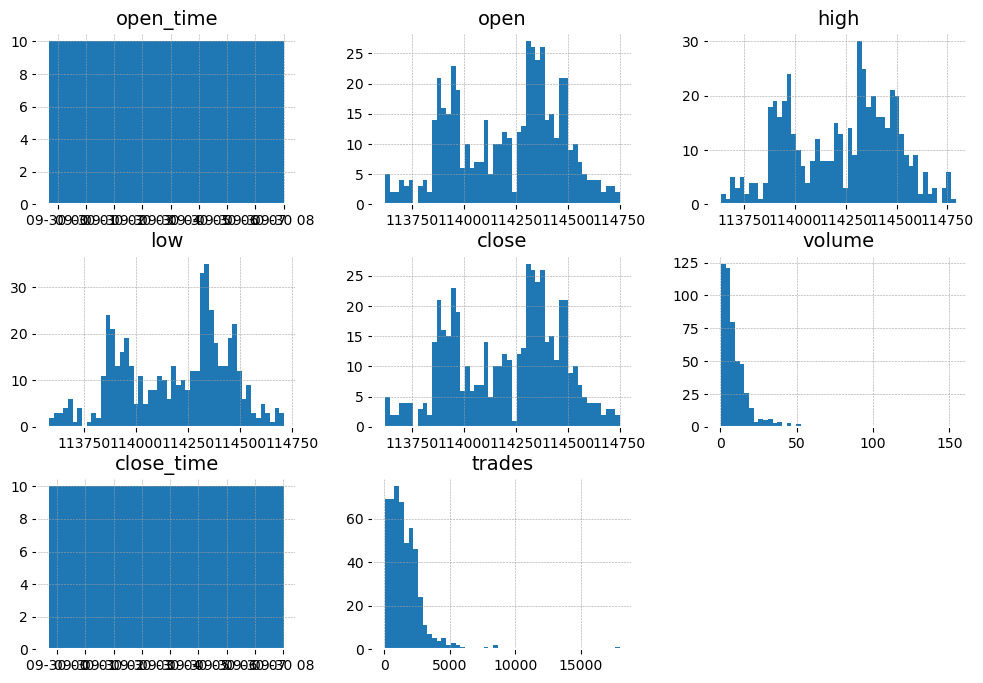

[2025-09-30 13:42:36.768000] Price: 113683.65, Qty: 0.00042[2025-09-30 13:42:36.768000] Price: 113683.65, Qty: 0.00042

[2025-09-30 13:42:36.768000] Price: 113683.65, Qty: 0.00042
[2025-09-30 13:42:37.214000] Price: 113683.65, Qty: 5e-05
[2025-09-30 13:42:37.214000] Price: 113683.65, Qty: 5e-05
[2025-09-30 13:42:37.214000] Price: 113683.65, Qty: 5e-05
[2025-09-30 13:42:37.425000] Price: 113683.65, Qty: 0.017[2025-09-30 13:42:37.425000] Price: 113683.65, Qty: 0.017

[2025-09-30 13:42:37.425000] Price: 113683.65, Qty: 0.017
[2025-09-30 13:42:38.196000] Price: 113683.64, Qty: 0.00188[2025-09-30 13:42:38.196000] Price: 113683.64, Qty: 0.00188

[2025-09-30 13:42:38.196000] Price: 113683.64, Qty: 0.00188
[2025-09-30 13:42:38.686000] Price: 113683.64, Qty: 0.0114
[2025-09-30 13:42:38.686000] Price: 113683.63, Qty: 0.0008
[2025-09-30 13:42:38.686000] Price: 113683.62, Qty: 0.0005
[2025-09-30 13:42:38.686000] Price: 113683.61, Qty: 0.0001
[2025-09-30 13:42:38.686000] Price: 113683.07, Qty: 0.00

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

klines_df.hist(bins=50, figsize=(12, 8))

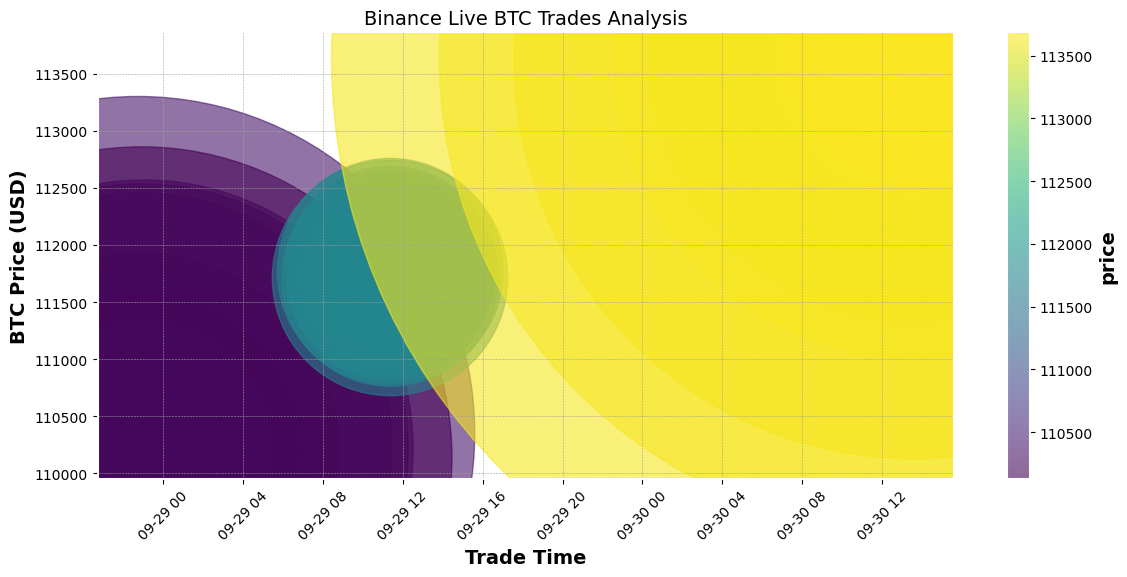

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load trades
trades = pd.read_csv("btc_trades.csv")

# Convert trade_time to datetime (handles both seconds + microseconds)
trades["trade_time"] = pd.to_datetime(trades["trade_time"], format="mixed")

# Scatter plot
trades.plot(
    kind="scatter",
    x="trade_time",
    y="price",
    s=trades["quantity"] * 50000,  # adjust scaling
    c="price",
    cmap="viridis",
    figsize=(12, 6),
    alpha=0.6
)

plt.xlabel("Trade Time")
plt.ylabel("BTC Price (USD)")
plt.title("Binance Live BTC Trades Analysis")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

